In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [357]:
data = pd.read_csv('../data/data.csv')
data = data.fillna(0)

well_meta = pd.read_csv('../data/meta.csv')
well_meta['group'] = well_meta.cat.apply(lambda x: x[0])

data['x'] = data.cat.apply(lambda x: well_meta[well_meta.cat == x].x.values[0])
data['y'] = data.cat.apply(lambda x: well_meta[well_meta.cat == x].y.values[0])

p_data = data[data.group == 'P']
i_data = data[data.group == 'I']

In [358]:
for idx in p_data.index:
    if idx % 2000 == 0:
        print(idx)
    date, start_lag, coef = p_data.loc[idx, ['date', 'start_lag', 'coef']]
    i1_row = i_data[(i_data.date == date) &
                    (i_data.start_lag == start_lag) &
                    (i_data.coef == coef) &
                    (i_data.cat == 'I1')]
    
    i2_row = i_data[(i_data.date == date) &
                    (i_data.start_lag == start_lag) &
                    (i_data.coef == coef) &
                    (i_data.cat == 'I2')]
    
    i3_row = i_data[(i_data.date == date) &
                    (i_data.start_lag == start_lag) &
                    (i_data.coef == coef) &
                    (i_data.cat == 'I3')]
    
    for col in i1_row.columns:
        p_data.loc[idx, f'i1_{col}'] = i1_row[col].values[0]
        p_data.loc[idx, f'i2_{col}'] = i2_row[col].values[0]
        
        if len(i3_row) > 0:
            p_data.loc[idx, f'i3_{col}'] = i3_row[col].values[0]

p_data = p_data.fillna(0)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000


In [359]:
data_init = p_data.drop(['i1_cat', 'i2_cat', 'i3_cat', 
                        'i1_group', 'i2_group', 'i3_group',
                        'i1_date', 'i2_date', 'i3_date',
                        'i1_start_lag', 'i2_start_lag', 'i3_start_lag',
                        'i1_coef', 'i2_coef', 'i3_coef',
                        'i1_oil', 'i2_oil', 'i3_oil',
                        'i1_liquid', 'i2_liquid', 'i3_liquid',
                        'i1_status', 'i2_status', 
                        'i1_is_base', 'i2_is_base', 'i3_is_base',
                        'group'], axis=1)

In [360]:
baseline = data_init[data_init.is_base].drop('is_base', axis=1).reset_index(drop=True)

In [361]:
baseline.head()

,cat,date,oil,water,liquid,bhp,status,start_lag,coef,x,...,i1_bhp,i2_bhp,i3_bhp,i3_status,i1_x,i2_x,i3_x,i1_y,i2_y,i3_y
0,P1,0,-0.001621,0.0,-0.001621,20000000.0,1.0,0.0,0.0,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
1,P2,0,-0.001903,0.0,-0.001903,20000000.0,1.0,0.0,0.0,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
2,P1,1,-0.001502,0.0,-0.001502,20000000.0,1.0,0.0,0.0,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
3,P2,1,-0.001747,0.0,-0.001747,20000000.0,1.0,0.0,0.0,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
4,P1,2,-0.001493,0.0,-0.001493,20000000.0,1.0,0.0,0.0,190,...,4.058030e+07,3.689916e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0


In [362]:
non_baseline = data_init[~data_init.is_base].drop('is_base', axis=1).reset_index(drop=True)
non_baseline.head()

,cat,date,oil,water,liquid,bhp,status,start_lag,coef,x,...,i1_bhp,i2_bhp,i3_bhp,i3_status,i1_x,i2_x,i3_x,i1_y,i2_y,i3_y
0,P1,0,-0.001621,0.0,-0.001621,20000000.0,1.0,19.0,0.42,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
1,P2,0,-0.001903,0.0,-0.001903,20000000.0,1.0,19.0,0.42,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
2,P1,1,-0.001502,0.0,-0.001502,20000000.0,1.0,19.0,0.42,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
3,P2,1,-0.001747,0.0,-0.001747,20000000.0,1.0,19.0,0.42,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0
4,P1,2,-0.001493,0.0,-0.001493,20000000.0,1.0,19.0,0.42,190,...,4.058030e+07,3.689916e+07,0.0,0.0,890.0,590.0,670.0,190.0,770.0,510.0


In [363]:
baseline.columns

Index(['cat', 'date', 'oil', 'water', 'liquid', 'bhp', 'status', 'start_lag',
       'coef', 'x', 'y', 'i1_water', 'i2_water', 'i3_water', 'i1_bhp',
       'i2_bhp', 'i3_bhp', 'i3_status', 'i1_x', 'i2_x', 'i3_x', 'i1_y', 'i2_y',
       'i3_y'],
      dtype='object')

In [364]:
baseline.start_lag.unique(), baseline.coef.unique()

(array([0.]), array([0.]))

In [365]:
baseline[(baseline.cat == 'P1') & (baseline.date == 6)].drop(['i3_status', 'i3_water', 'i3_bhp',
                                                                               'i1_x', 'i1_y', 
                                                                               'i2_x', 'i2_y', 
                                                                               'i3_x', 'i3_y',
                                                                               'cat', 'date', 'status',
                                                                               'x', 'y',
                                                                               'start_lag', 'coef'], axis=1)

,oil,water,liquid,bhp,i1_water,i2_water,i1_bhp,i2_bhp
12,-0.001724,0.0,-0.001724,20000000.0,0.002533,0.001267,4.166565e+07,3.777362e+07


In [366]:
baseline.head()

,cat,date,oil,water,liquid,bhp,status,start_lag,coef,x,...,i1_bhp,i2_bhp,i3_bhp,i3_status,i1_x,i2_x,i3_x,i1_y,i2_y,i3_y
0,P1,0,-0.001621,0.0,-0.001621,20000000.0,1.0,0.0,0.0,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
1,P2,0,-0.001903,0.0,-0.001903,20000000.0,1.0,0.0,0.0,190,...,4.018987e+07,3.665494e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
2,P1,1,-0.001502,0.0,-0.001502,20000000.0,1.0,0.0,0.0,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
3,P2,1,-0.001747,0.0,-0.001747,20000000.0,1.0,0.0,0.0,190,...,4.024292e+07,3.666387e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0
4,P1,2,-0.001493,0.0,-0.001493,20000000.0,1.0,0.0,0.0,190,...,4.058030e+07,3.689916e+07,0.0,0.0,890.0,590.0,0.0,190.0,770.0,0.0


In [367]:
for idx in non_baseline.index:
    if idx % 2000 == 0:
        print(idx)
    
    cat, date  = non_baseline.loc[idx, ['cat', 'date']]
    base_row = baseline[(baseline.cat == cat) & (baseline.date == date)].drop(['i3_status', 'i3_water', 'i3_bhp',
                                                                               'i1_x', 'i1_y', 
                                                                               'i2_x', 'i2_y', 
                                                                               'i3_x', 'i3_y',
                                                                               'cat', 'date', 'status',
                                                                               'x', 'y',
                                                                               'start_lag', 'coef'], axis=1)
    
    for col in base_row.columns:
        non_baseline.loc[idx, f'base_{col}'] = base_row[col].values[0]


0
2000
4000
6000
8000
10000


In [368]:
non_baseline

,cat,date,oil,water,liquid,bhp,status,start_lag,coef,x,...,i2_y,i3_y,base_oil,base_water,base_liquid,base_bhp,base_i1_water,base_i2_water,base_i1_bhp,base_i2_bhp
0,P1,0,-0.001621,0.000000,-0.001621,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001621,0.000000,-0.001621,20000000.0,0.002533,0.001267,4.018987e+07,3.665494e+07
1,P2,0,-0.001903,0.000000,-0.001903,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001903,0.000000,-0.001903,20000000.0,0.002533,0.001267,4.018987e+07,3.665494e+07
2,P1,1,-0.001502,0.000000,-0.001502,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001502,0.000000,-0.001502,20000000.0,0.002533,0.001267,4.024292e+07,3.666387e+07
3,P2,1,-0.001747,0.000000,-0.001747,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001747,0.000000,-0.001747,20000000.0,0.002533,0.001267,4.024292e+07,3.666387e+07
4,P1,2,-0.001493,0.000000,-0.001493,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001493,0.000000,-0.001493,20000000.0,0.002533,0.001267,4.058030e+07,3.689916e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,P2,27,-0.000256,-0.002069,-0.002326,20000000.0,1.0,9.0,0.08,190,...,770.0,510.0,-0.000251,-0.001899,-0.002150,20000000.0,0.002533,0.001267,3.309469e+07,2.961056e+07
11516,P1,28,-0.000364,-0.001428,-0.001792,20000000.0,1.0,9.0,0.08,190,...,770.0,510.0,-0.000359,-0.001302,-0.001661,20000000.0,0.002533,0.001267,3.294920e+07,2.947955e+07
11517,P2,28,-0.000245,-0.002073,-0.002318,20000000.0,1.0,9.0,0.08,190,...,770.0,510.0,-0.000240,-0.001902,-0.002143,20000000.0,0.002533,0.001267,3.294920e+07,2.947955e+07
11518,P1,29,-0.000350,-0.001447,-0.001797,20000000.0,1.0,9.0,0.08,190,...,770.0,510.0,-0.000345,-0.001319,-0.001665,20000000.0,0.002533,0.001267,3.281453e+07,2.935853e+07


In [369]:
non_baseline.head()

,cat,date,oil,water,liquid,bhp,status,start_lag,coef,x,...,i2_y,i3_y,base_oil,base_water,base_liquid,base_bhp,base_i1_water,base_i2_water,base_i1_bhp,base_i2_bhp
0,P1,0,-0.001621,0.0,-0.001621,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001621,0.0,-0.001621,20000000.0,0.002533,0.001267,4.018987e+07,3.665494e+07
1,P2,0,-0.001903,0.0,-0.001903,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001903,0.0,-0.001903,20000000.0,0.002533,0.001267,4.018987e+07,3.665494e+07
2,P1,1,-0.001502,0.0,-0.001502,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001502,0.0,-0.001502,20000000.0,0.002533,0.001267,4.024292e+07,3.666387e+07
3,P2,1,-0.001747,0.0,-0.001747,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001747,0.0,-0.001747,20000000.0,0.002533,0.001267,4.024292e+07,3.666387e+07
4,P1,2,-0.001493,0.0,-0.001493,20000000.0,1.0,19.0,0.42,190,...,770.0,510.0,-0.001493,0.0,-0.001493,20000000.0,0.002533,0.001267,4.058030e+07,3.689916e+07


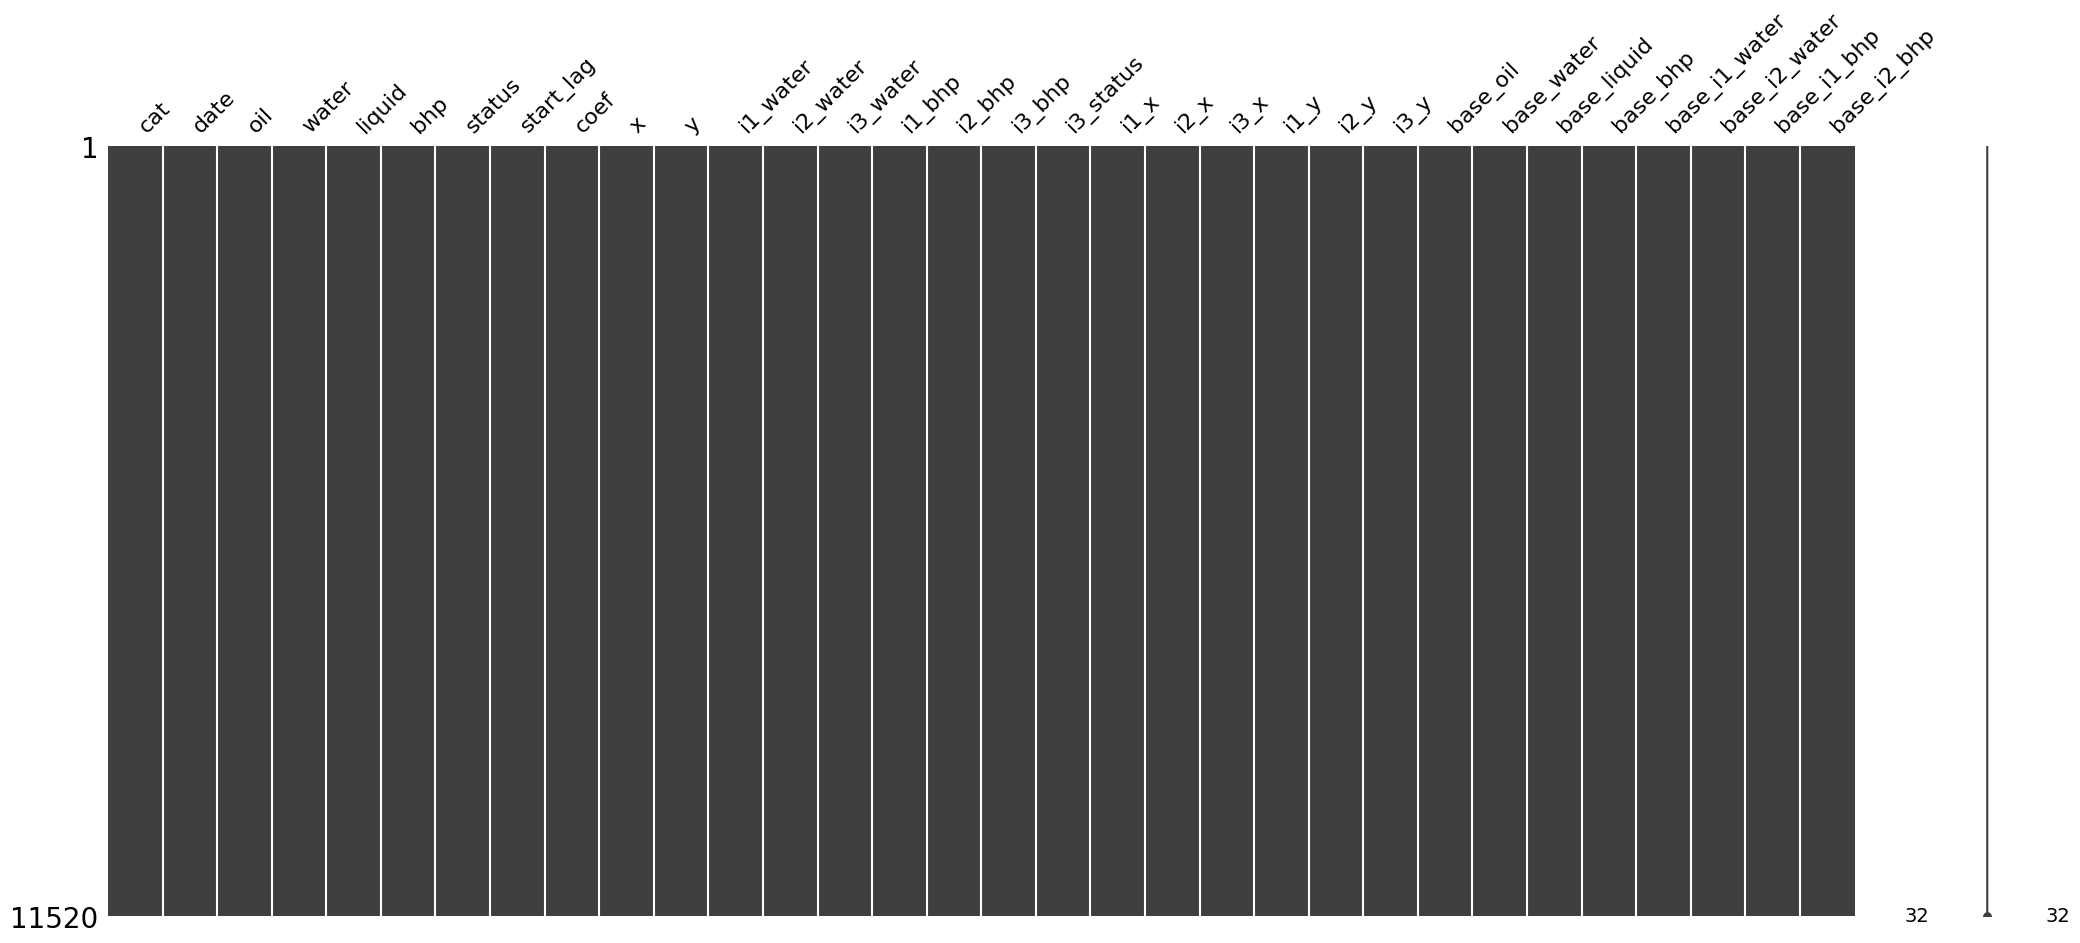

In [370]:
import missingno as msno

msno.matrix(non_baseline)
plt.show()

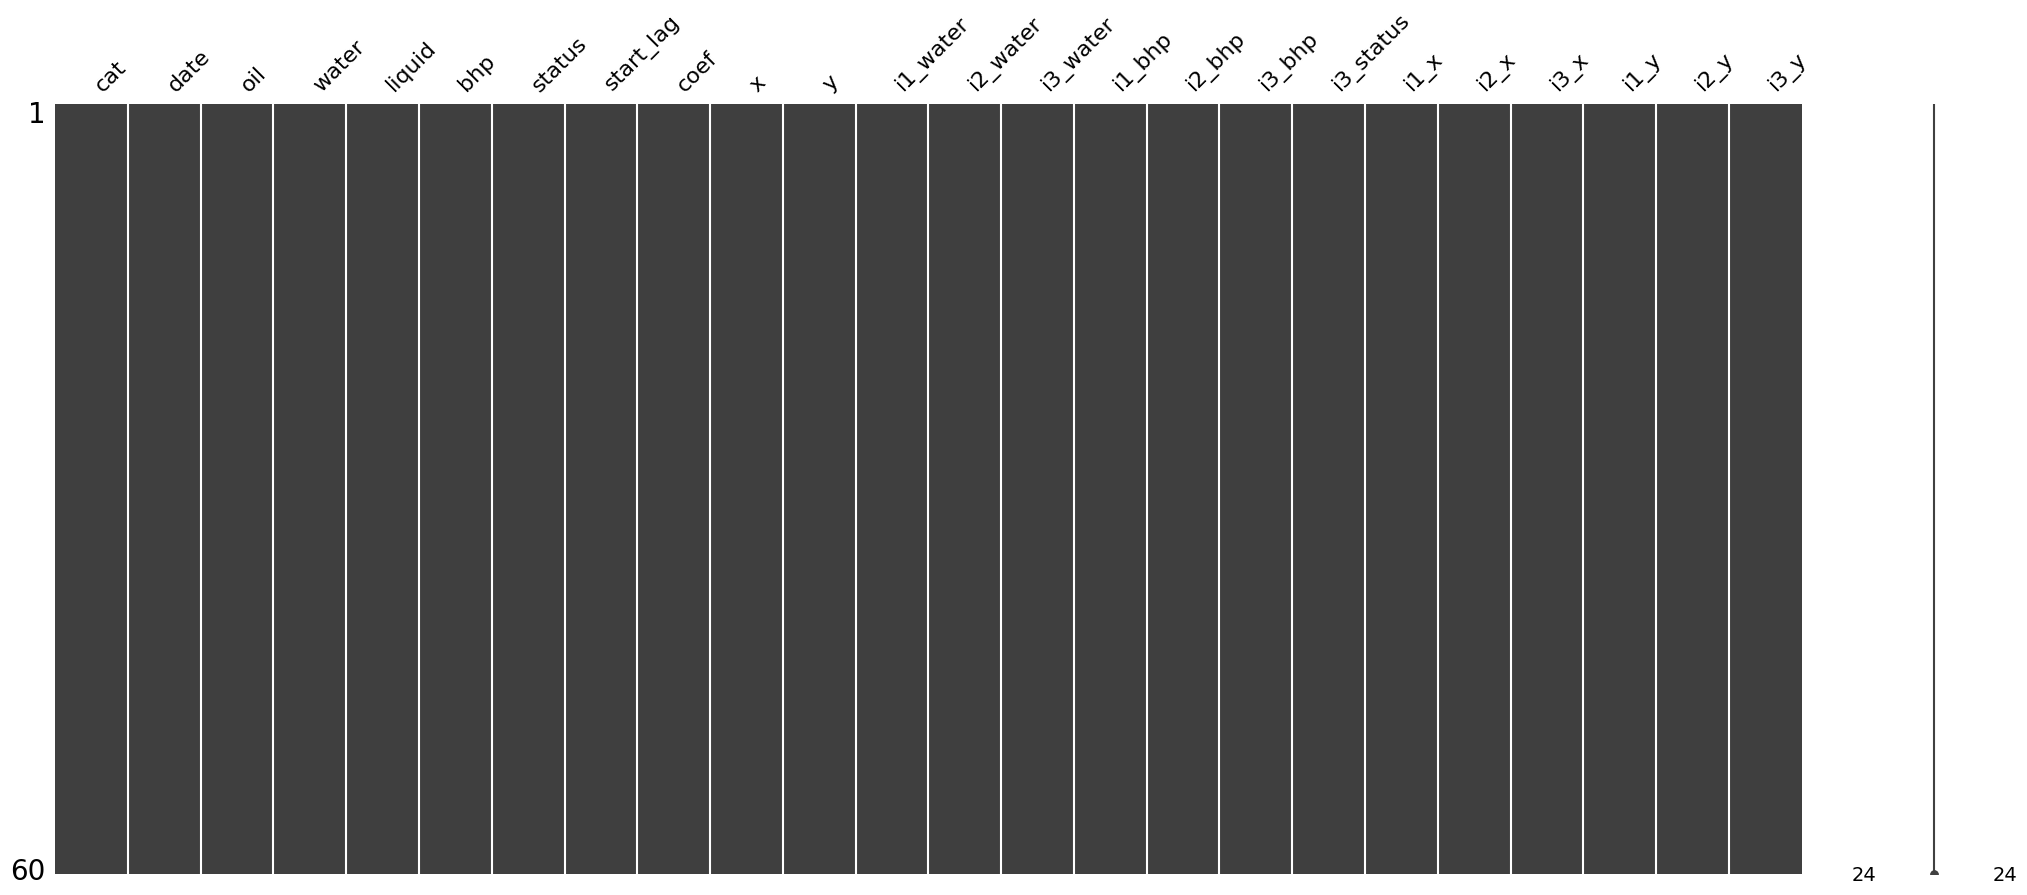

In [371]:
msno.matrix(baseline)
plt.show()

In [372]:
non_baseline['dist2I1'] = np.sqrt((non_baseline.x - non_baseline.i1_x)**2 + (non_baseline.y - non_baseline.i1_y)**2)
non_baseline['dist2I2'] = np.sqrt((non_baseline.x - non_baseline.i2_x)**2 + (non_baseline.y - non_baseline.i2_y)**2)
non_baseline['dist2I3'] = np.sqrt((non_baseline.x - non_baseline.i3_x)**2 + (non_baseline.y - non_baseline.i3_y)**2)

In [373]:
non_baseline = non_baseline.drop(['status', 'x', 'y'], axis=1)

In [374]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)

sel.fit(non_baseline.drop(['cat'], axis=1))

cols2keep = non_baseline.drop(['cat'], axis=1).columns[sel.get_support()]

In [375]:
data_clean = non_baseline[['cat'] + list(cols2keep)]

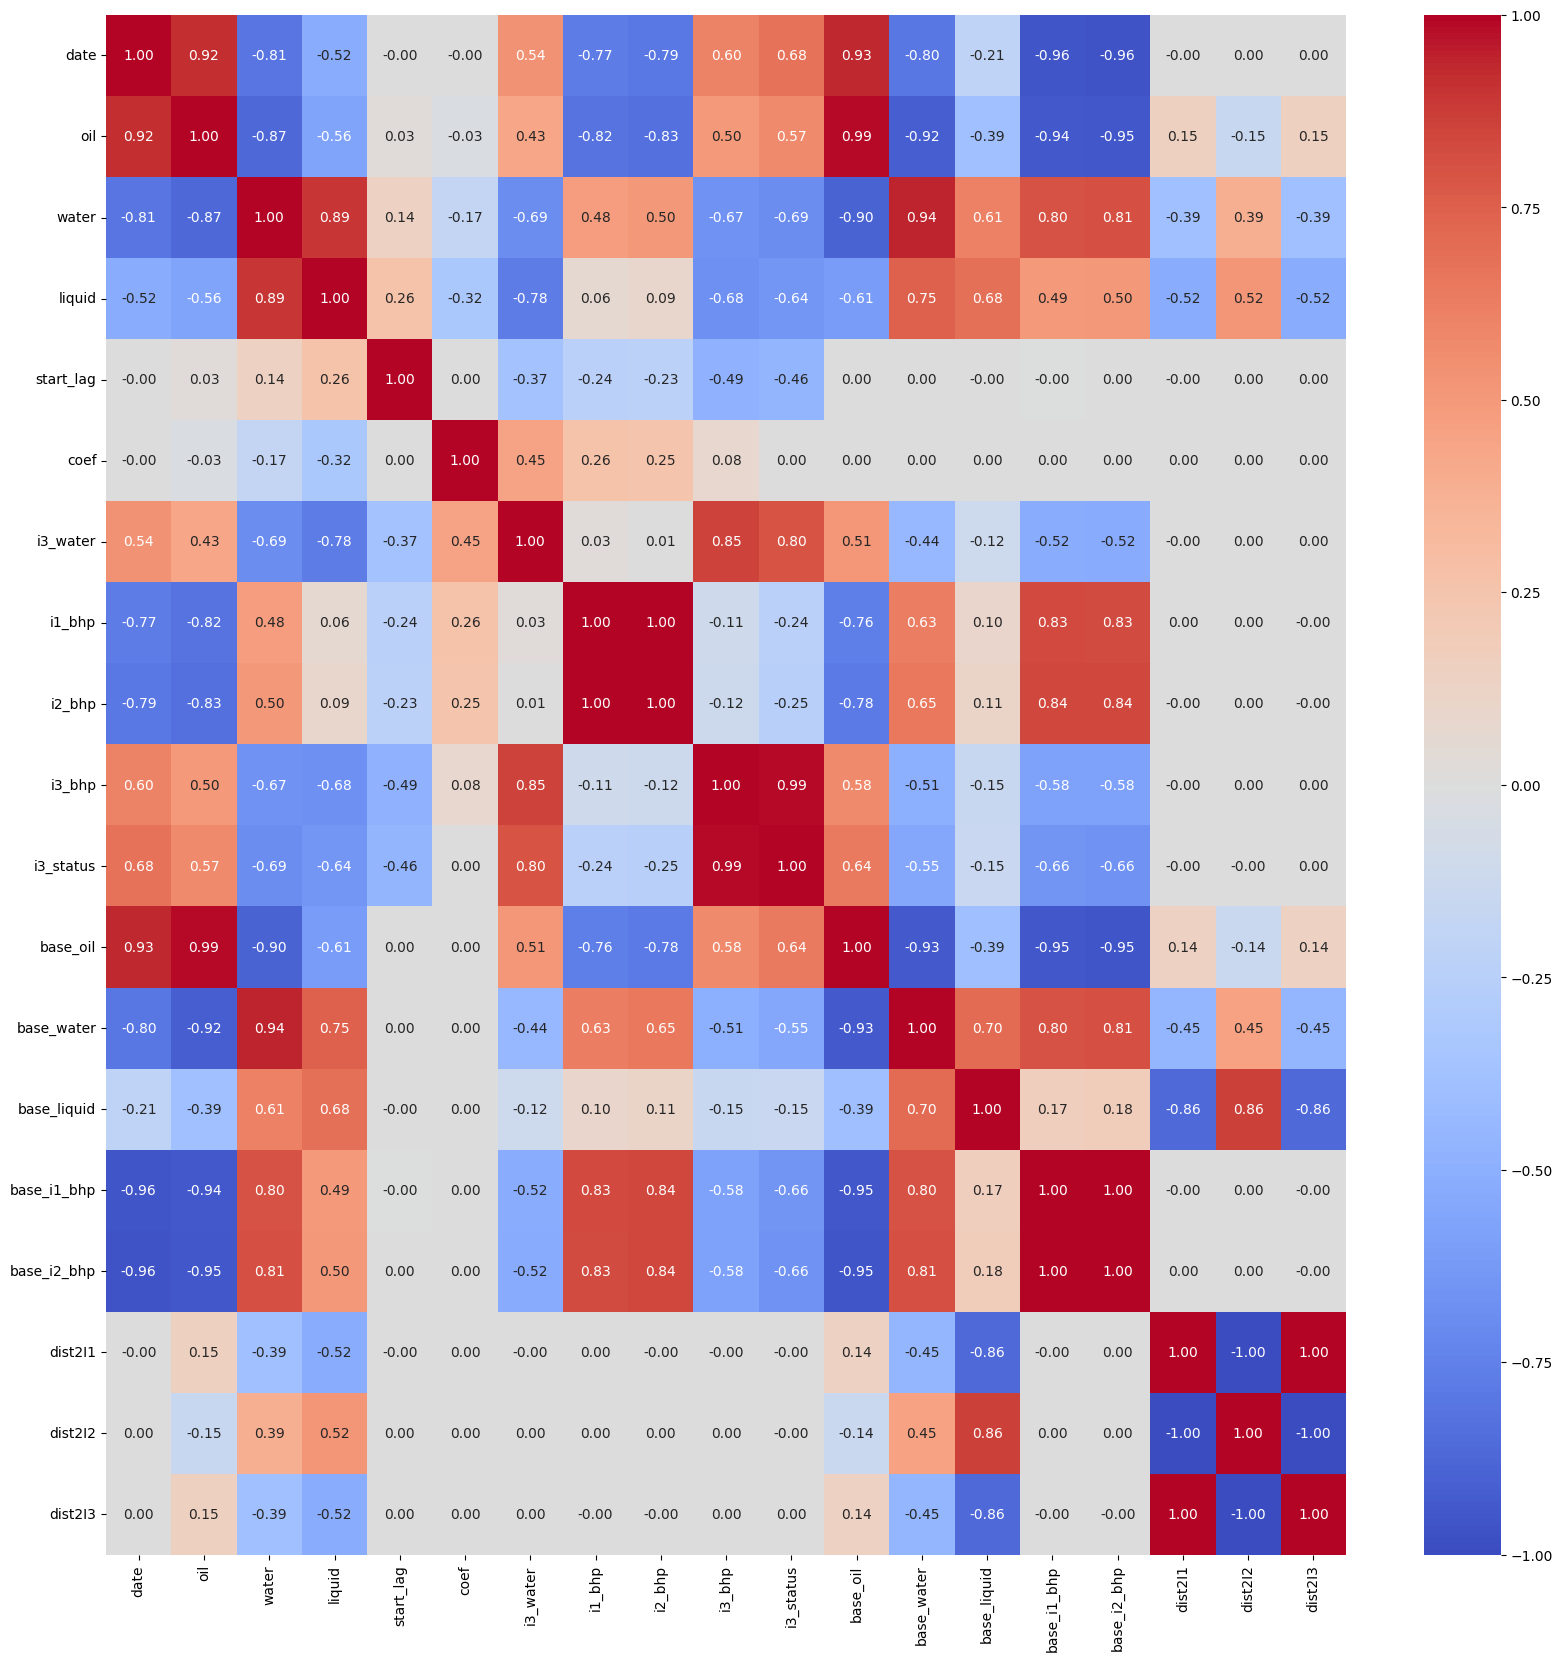

In [376]:
corr = data_clean.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')    
plt.show()

In [377]:
#data_clean['delta_baseline'] = data_clean['oil'] - data_clean['base_oil']

data_lagged = data_clean.join(data_clean.drop(['dist2I1', 'dist2I2', 'dist2I3', 'date'], axis=1)
                                        .groupby(['cat', 'start_lag', 'coef'])
                                        .shift(1)
                                        .add_suffix('_1d_ago')
                                        ).fillna(0)

for i in range(2, 28):
    data_lagged = data_lagged.join(data_clean.drop(['dist2I1', 'dist2I2', 'dist2I3', 'date'], axis=1)
                                             .groupby(['cat', 'start_lag', 'coef'])
                                             .shift(i)
                                             .add_suffix(f'_{i}d_ago')
                                             ).fillna(0)
    
data_lagged['cat'] = data_lagged['cat'].apply(lambda x: int(x[1]))
data_lagged

,cat,date,oil,water,liquid,start_lag,coef,i3_water,i1_bhp,i2_bhp,...,i3_water_27d_ago,i1_bhp_27d_ago,i2_bhp_27d_ago,i3_bhp_27d_ago,i3_status_27d_ago,base_oil_27d_ago,base_water_27d_ago,base_liquid_27d_ago,base_i1_bhp_27d_ago,base_i2_bhp_27d_ago
0,1,0,-0.001621,0.000000,-0.001621,19.0,0.42,0.000000,4.018987e+07,3.665494e+07,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
1,2,0,-0.001903,0.000000,-0.001903,19.0,0.42,0.000000,4.018987e+07,3.665494e+07,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
2,1,1,-0.001502,0.000000,-0.001502,19.0,0.42,0.000000,4.024292e+07,3.666387e+07,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
3,2,1,-0.001747,0.000000,-0.001747,19.0,0.42,0.000000,4.024292e+07,3.666387e+07,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
4,1,2,-0.001493,0.000000,-0.001493,19.0,0.42,0.000000,4.058030e+07,3.689916e+07,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,2,27,-0.000256,-0.002069,-0.002326,9.0,0.08,0.000304,3.359148e+07,3.007493e+07,...,0.0,4.018987e+07,3.665494e+07,0.0,0.0,-0.001903,0.0,-0.001903,4.018987e+07,3.665494e+07
11516,1,28,-0.000364,-0.001428,-0.001792,9.0,0.08,0.000304,3.343621e+07,2.993461e+07,...,0.0,4.024292e+07,3.666387e+07,0.0,0.0,-0.001502,0.0,-0.001502,4.024292e+07,3.666387e+07
11517,2,28,-0.000245,-0.002073,-0.002318,9.0,0.08,0.000304,3.343621e+07,2.993461e+07,...,0.0,4.024292e+07,3.666387e+07,0.0,0.0,-0.001747,0.0,-0.001747,4.024292e+07,3.666387e+07
11518,1,29,-0.000350,-0.001447,-0.001797,9.0,0.08,0.000304,3.329215e+07,2.980460e+07,...,0.0,4.058030e+07,3.689916e+07,0.0,0.0,-0.001493,0.0,-0.001493,4.058030e+07,3.689916e+07


In [378]:
data_lagged.columns.tolist()

['cat',
 'date',
 'oil',
 'water',
 'liquid',
 'start_lag',
 'coef',
 'i3_water',
 'i1_bhp',
 'i2_bhp',
 'i3_bhp',
 'i3_status',
 'base_oil',
 'base_water',
 'base_liquid',
 'base_i1_bhp',
 'base_i2_bhp',
 'dist2I1',
 'dist2I2',
 'dist2I3',
 'oil_1d_ago',
 'water_1d_ago',
 'liquid_1d_ago',
 'i3_water_1d_ago',
 'i1_bhp_1d_ago',
 'i2_bhp_1d_ago',
 'i3_bhp_1d_ago',
 'i3_status_1d_ago',
 'base_oil_1d_ago',
 'base_water_1d_ago',
 'base_liquid_1d_ago',
 'base_i1_bhp_1d_ago',
 'base_i2_bhp_1d_ago',
 'oil_2d_ago',
 'water_2d_ago',
 'liquid_2d_ago',
 'i3_water_2d_ago',
 'i1_bhp_2d_ago',
 'i2_bhp_2d_ago',
 'i3_bhp_2d_ago',
 'i3_status_2d_ago',
 'base_oil_2d_ago',
 'base_water_2d_ago',
 'base_liquid_2d_ago',
 'base_i1_bhp_2d_ago',
 'base_i2_bhp_2d_ago',
 'oil_3d_ago',
 'water_3d_ago',
 'liquid_3d_ago',
 'i3_water_3d_ago',
 'i1_bhp_3d_ago',
 'i2_bhp_3d_ago',
 'i3_bhp_3d_ago',
 'i3_status_3d_ago',
 'base_oil_3d_ago',
 'base_water_3d_ago',
 'base_liquid_3d_ago',
 'base_i1_bhp_3d_ago',
 'base_i2_bhp_

In [379]:
data_lagged = data_lagged.drop(['i3_water', 'i1_bhp', 'i2_bhp', 'i3_bhp'], axis=1)
data_lagged['delta_baseline'] = data_lagged['oil'] - data_lagged['base_oil']

In [380]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

/home/zeinovich/anaconda3/envs/kaggle1/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zeinovich/anaconda3/envs/kaggle1/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


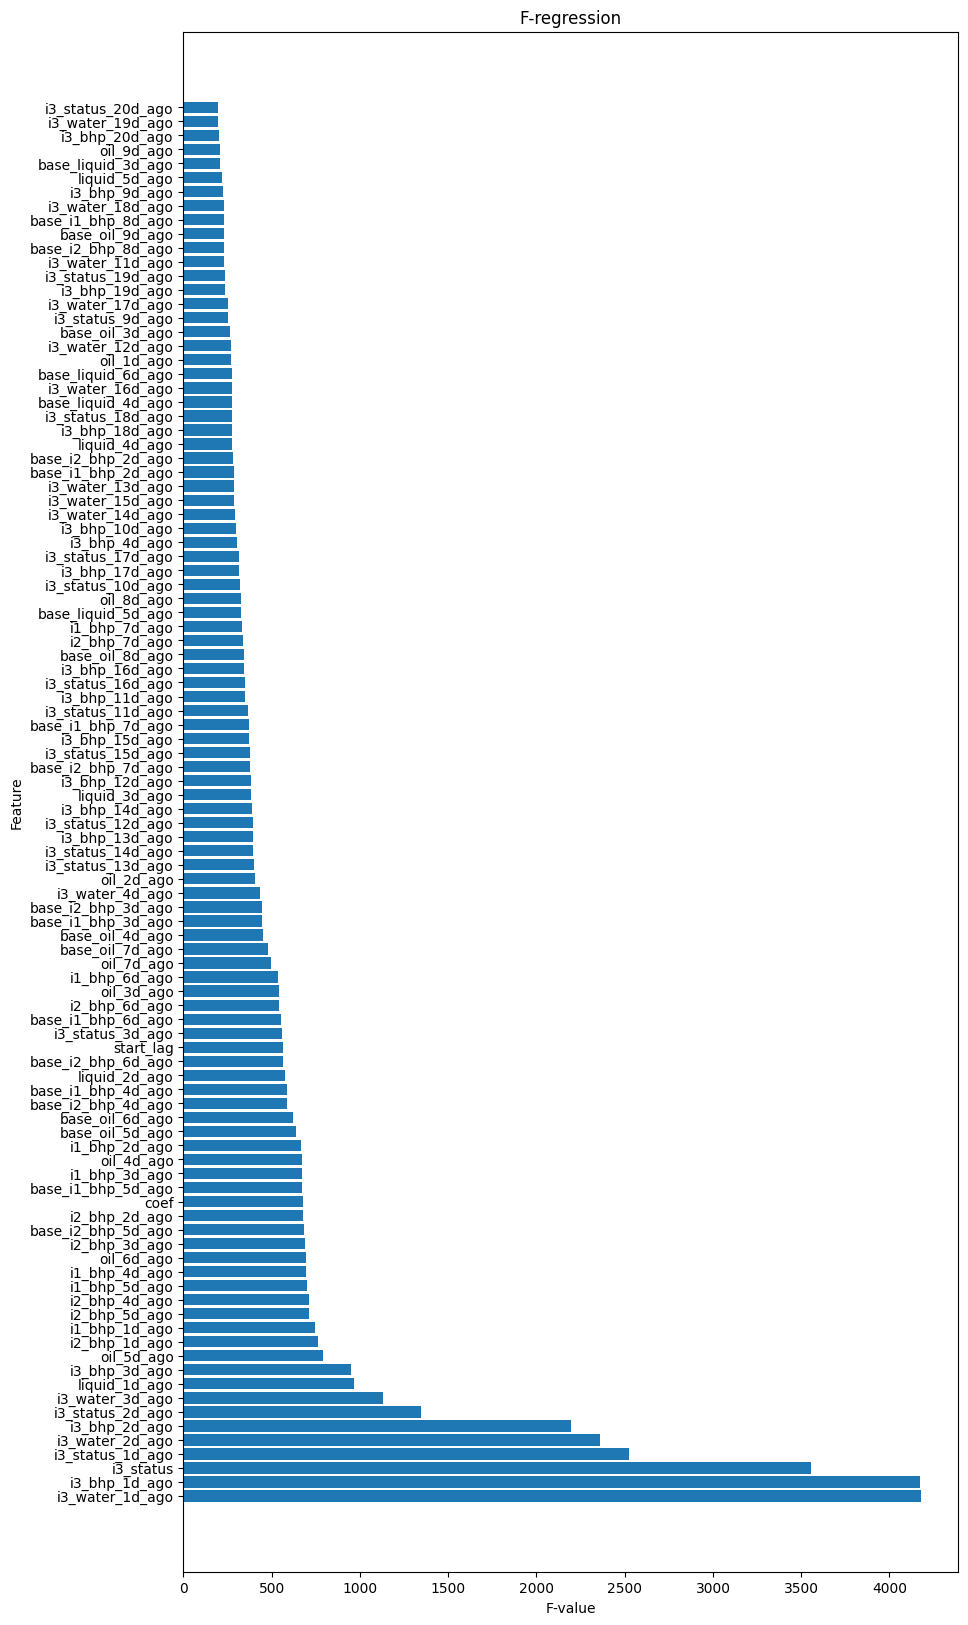

In [381]:
from sklearn.feature_selection import f_regression

f_reg = f_regression(data_lagged.drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1), 
                     data_lagged[['delta_baseline']])

f_features = (pd.DataFrame({
                        'feature': (
                                     data_lagged
                                     .drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1)
                                     .columns
                                     ), 
                        'importance': f_reg[0]
                        })
                        .sort_values('importance', ascending=False)
            )

plt.figure(figsize=(10, 20))
plt.barh(f_features[:100].feature, f_features[:100].importance)
plt.title('F-regression')
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.show()

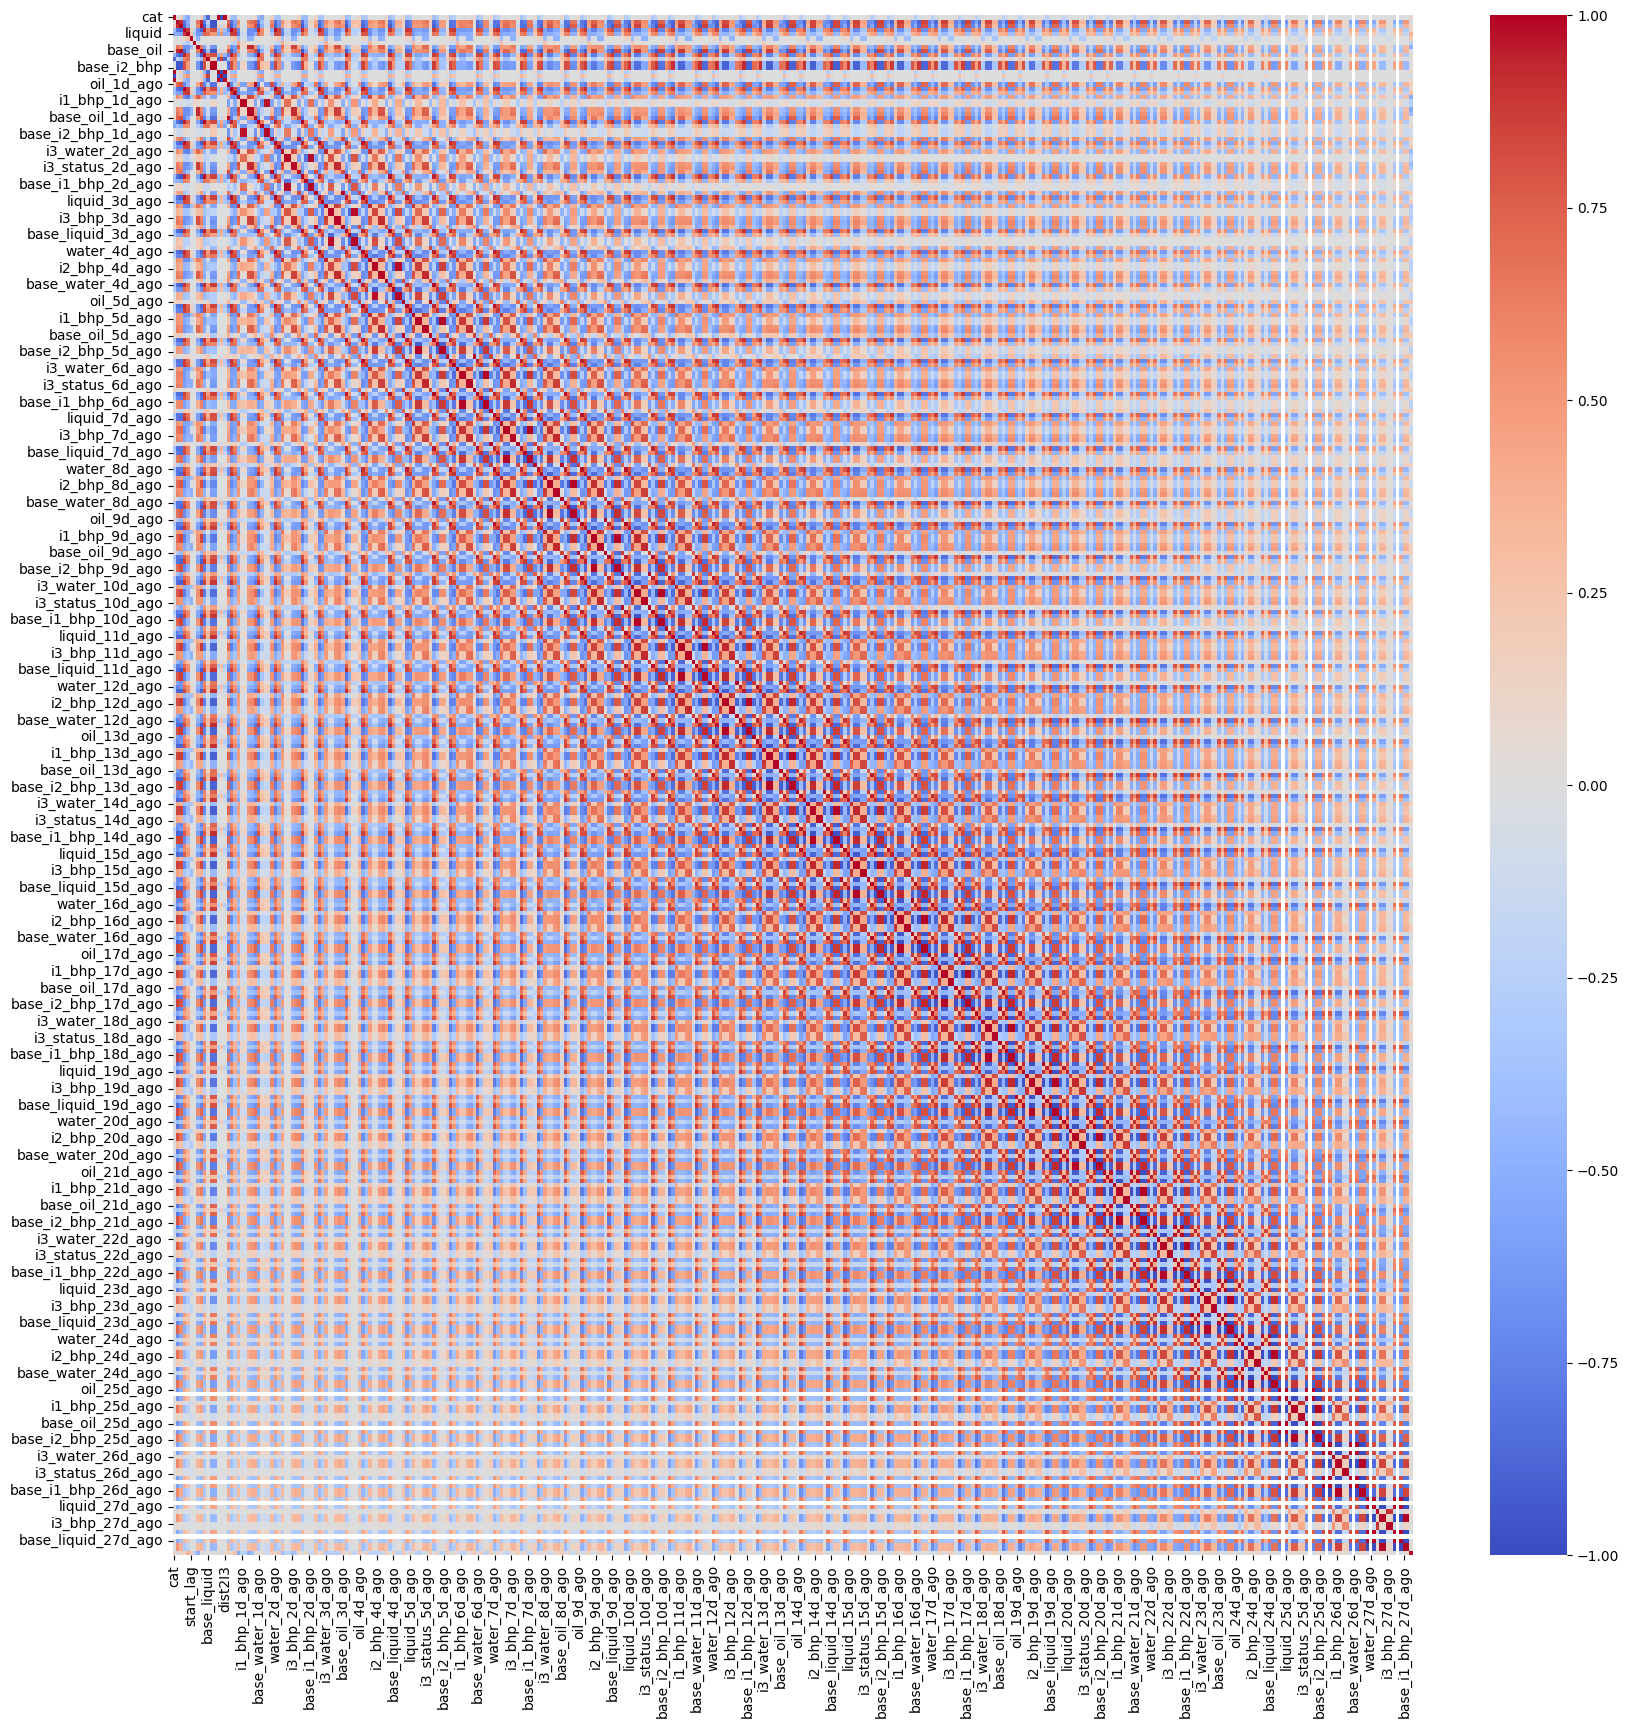

In [382]:
corr = data_lagged.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [383]:
def train_fn(data, model, horizon):    
    train = data[data.date < horizon]
    test = data[(data.date >= horizon) & (data.date < horizon + 3)]

    for days_past, day in enumerate(test.date.unique()):
        for col in test.columns:
            for past in range(days_past + 1):
                if f'{past}d_ago' in col:
                    test.loc[test.date == day, col] = -1

    model.fit(X=train.drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1), y=train.delta_baseline)
    y_pred = model.predict(test.drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1))    
    return mean_absolute_percentage_error(test.oil, y_pred +  test.base_oil) * 100

In [384]:
def train_model(data, model, stride=1):    
    mapes = [train_fn(data, model, i) for i in range(2, 27, stride)]
    
    plt.bar(range(3, 28, stride), mapes)
    plt.title(f'MAPE for {model.__class__.__name__}, Mean = {np.mean(mapes):.2f}%')
    plt.xlabel('Horizon, day')
    plt.ylabel('MAPE, %')
    plt.show()
    return model

In [ ]:
cols = ['oil', 'water', 'liquid', 'delta_baseline', 'cat', 'start_lag', 'coef', 'date']
cols += f_features[:50].feature.tolist()

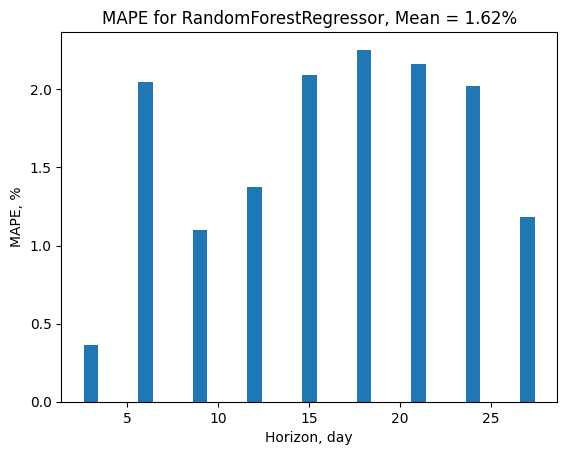

In [400]:
from sklearn.ensemble import RandomForestRegressor

rf = train_model(data_lagged, RandomForestRegressor(), stride=3)

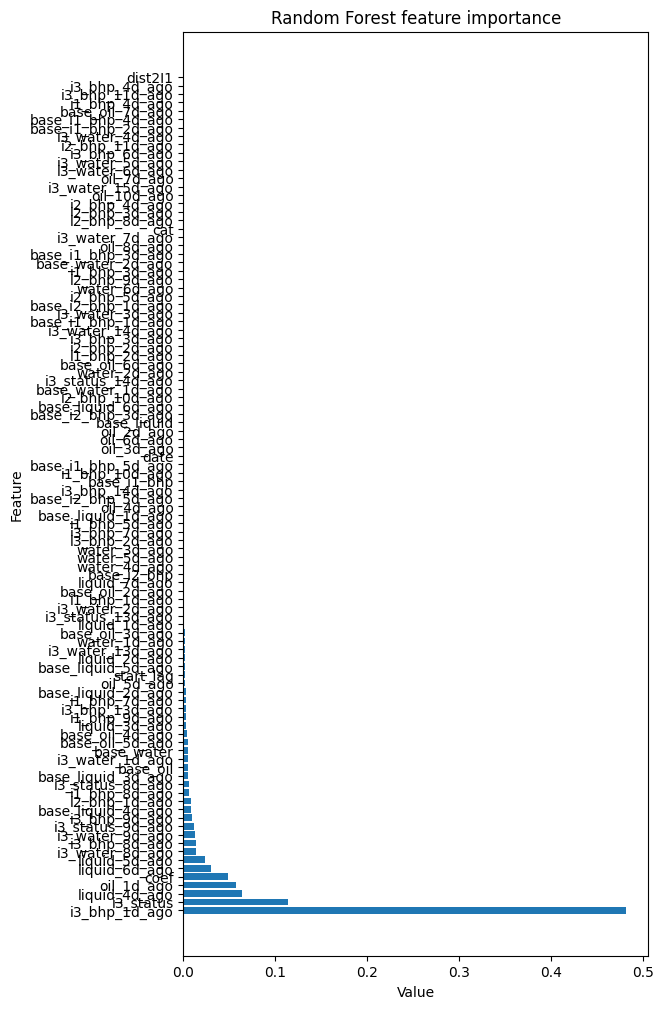

In [401]:
features = (pd.DataFrame({
                            'feature': (data_lagged
                                        .drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1)
                                        .columns),
                            'importance': rf.feature_importances_
                            })      
                            .sort_values('importance', ascending=False))

plt.figure(figsize=(6, 12))
plt.barh(features[:100].feature, features[:100].importance)
plt.title('Random Forest feature importance')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

47


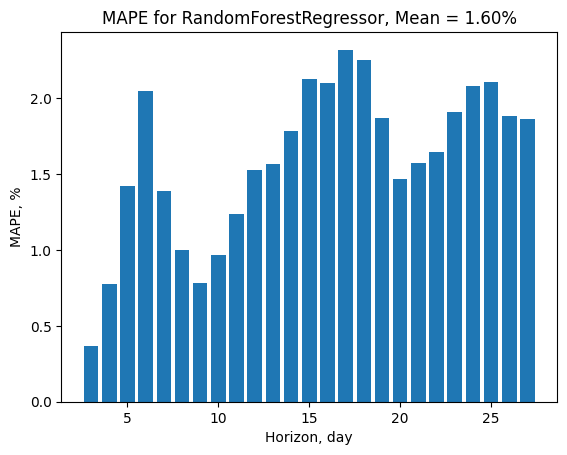

In [408]:
cols = features[features.importance > 0.001].feature.tolist()

cols += ['oil', 'water', 'liquid', 'delta_baseline', 'date', 'base_oil']

print(len(cols))
cols = list(set(cols))

rf = train_model(data_lagged[cols], RandomForestRegressor(), stride=1)

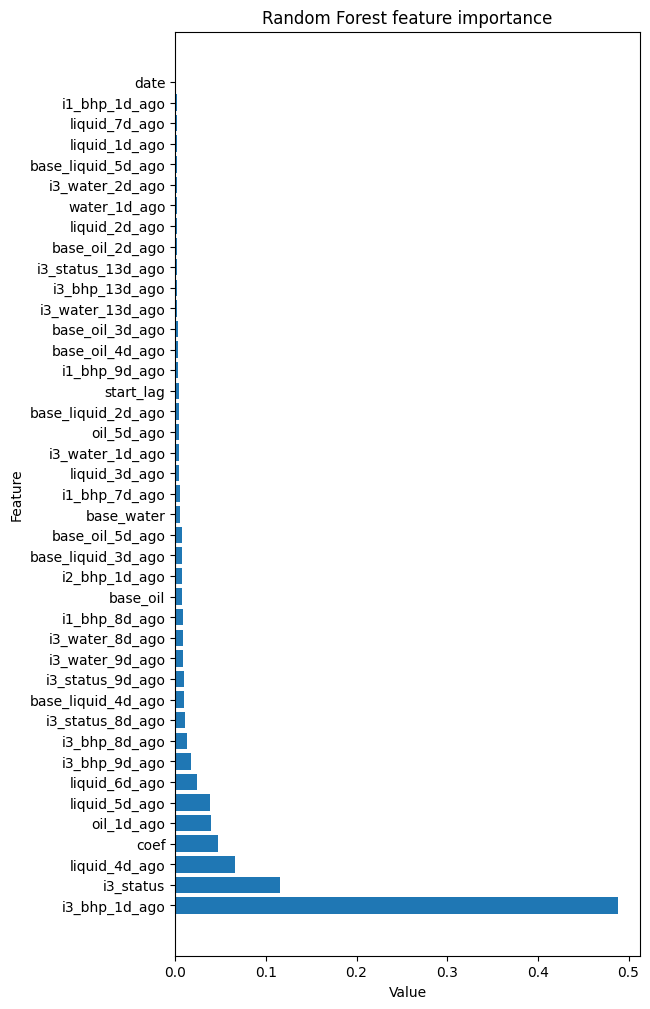

In [405]:
features = (pd.DataFrame({
                            'feature': (data_lagged[cols]
                                        .drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1)
                                        .columns),
                            'importance': rf.feature_importances_
                            })      
                            .sort_values('importance', ascending=False))

plt.figure(figsize=(6, 12))
plt.barh(features[:100].feature, features[:100].importance)
plt.title('Random Forest feature importance')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

In [406]:
def pred_ints(model: RandomForestRegressor, X: pd.DataFrame, percentile=95):
    err_down = []
    err_up = []
    
    for x in range(len(X)):
        preds = [pred.predict(np.array(X.iloc[x], ndmin=2)) for pred in model.estimators_]
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.))

    return np.array(err_down), np.array(err_up)

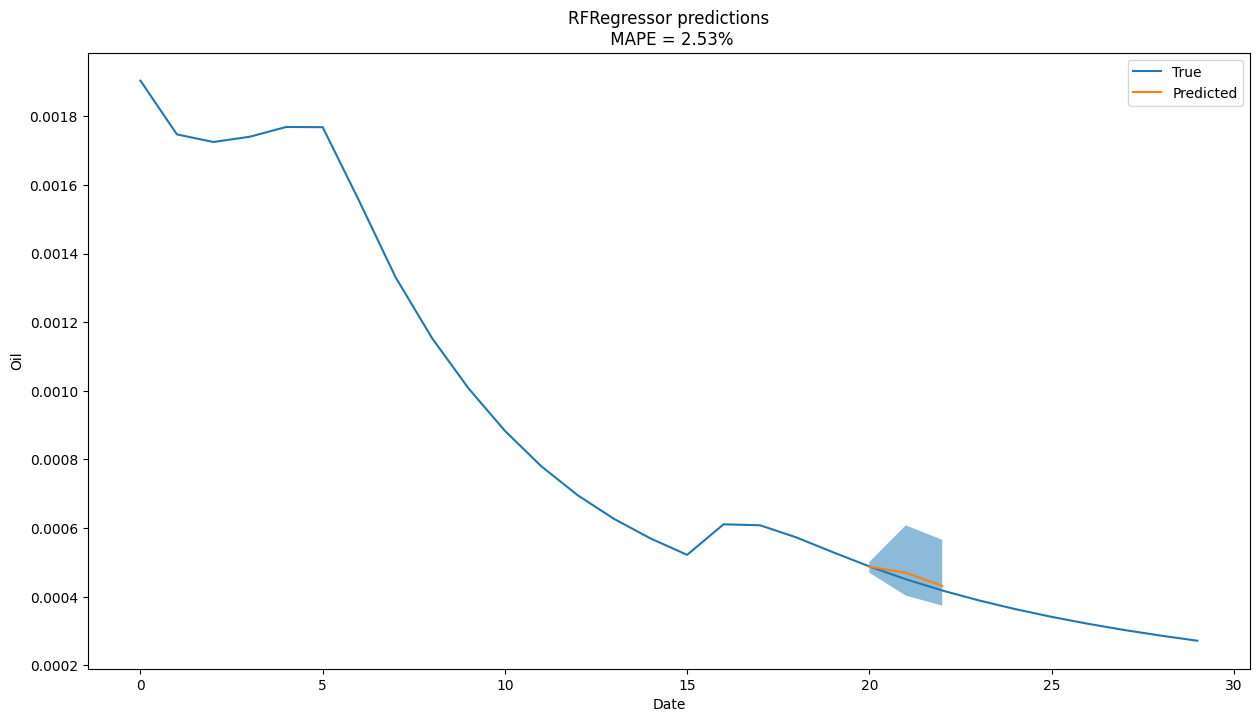

In [407]:
train = data_lagged[(data_lagged.date < 20) &
                    (data_lagged.cat == 2)]

test = data_lagged[(data_lagged.date >= 20) & (data_lagged.date < 23) &
                    (data_lagged.coef == 0.67) &
                    (data_lagged.start_lag == 15) &
                    (data_lagged.cat == 2)]

for days_past, day in enumerate(test.date.unique()):
    for col in test.columns:
        for past in range(days_past + 1):
            if f'{past}d_ago' in col:
                test.loc[test.date == day, col] = -1

X_sample = test[cols].drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1)
y_sample = test.delta_baseline

X_train = train[cols].drop(['oil', 'water', 'liquid', 'delta_baseline'], axis=1)
y_train = train.delta_baseline
rf.fit(X_train, y_train)

sample_pred = rf.predict(X_sample)
sample_lower, sample_upper = pred_ints(rf, X_sample, percentile=95)
#sample_true = pd.concat([train, test], axis=0)
sample_true = data_lagged[(data_lagged.start_lag == 15) &
                          (data_lagged.coef == 0.67) &
                          (data_lagged.cat == 2)]

plt.figure(figsize=(15, 8))
plt.title('RFRegressor predictions\
\n MAPE = {:.2f}%'.format(mean_absolute_percentage_error(test.oil, sample_pred + test.base_oil) * 100))
plt.xlabel('Date')
plt.ylabel('Oil')
plt.plot(sample_true.date, - sample_true.oil, label='True')
plt.plot(test.date,  - sample_pred - test.base_oil, label='Predicted')
plt.fill_between(test.date, - sample_lower - test.base_oil, - sample_upper - test.base_oil, alpha=0.5)
plt.legend()
plt.show()